In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Working Directory
import os

os.chdir('/content/drive/MyDrive/Deep Learning Class/8 - Autoencoders')

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import json, codecs
from keras.models import Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D

# Data Prepare And Review <a id = "0"></a>
[Go Content](#cont)

In this chapter, I prepared the dataset for the model and I reviewed it.

In [4]:
# I read the dataset with the pandas library.
train = pd.read_csv("../Datasets/fasion-mnist-train.csv")
test = pd.read_csv("../Datasets/fasion-mnist-test.csv")

In [5]:
# Train dataset
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# test dataset
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# I removed the label column because I don't need it.
x_train = train.drop(labels = ["label"], axis = 1)
# x_test = test.drop(labels = ["label"], axis = 1)
x_test = test
x_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# I changed the type of dataset.
# I normalize the data by dividing by 255.0.
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

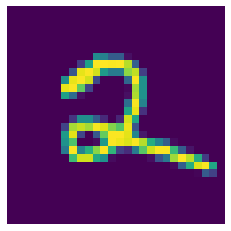

In [12]:
# I visualized some image within the dataset.
img = x_train.iloc[41000].to_numpy()
img = img.reshape((28,28))
plt.imshow(img)
plt.axis("off")
plt.show()

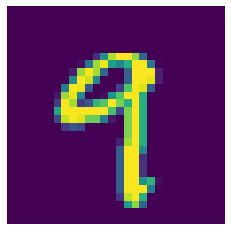

In [13]:
# I visualized some image within the dataset.
img = x_train.iloc[19246].to_numpy()
img = img.reshape((28,28))
plt.imshow(img)
plt.axis("off")
plt.show()

# Autoencoders <a id = "1"></a>


## The Simple Autoencoders <a id = "1a"></a>
[Go Content](#cont)

In this chapter, I created a basic Autoencoders model and I made to train with this model. I visualized the results of simple autoencoders.

### Create Model <a id = "1a1"></a>
[Go Content](#cont)

I created the model in the below code.

In [ ]:
input_img = Input(shape = (784,))

encoded0 = Dense(32, activation = "relu")(input_img)

encoded1 = Dense(16, activation = "relu")(encoded0)

decoded0 = Dense(32, activation = "relu")(encoded1)

decoded1 = Dense(784, activation = "sigmoid")(decoded0)

sim_autoencoder = Model(input_img, decoded1)

sim_autoencoder.compile(optimizer = "rmsprop", loss = "binary_crossentropy")

In [ ]:
# Structure of Model
sim_autoencoder.summary()

### Train Model <a id = "1a2"></a>
[Go Content](#cont)

In this chapter, I am training with the model.

In [ ]:
sim_hist = sim_autoencoder.fit(x_train, x_train,
                      epochs = 100,
                      batch_size = 256,
                      shuffle = True,
                      validation_data = (x_train, x_train))

### Model Result Evaluation <a id = "1a3"></a>
[Go Content](#cont)

In this chapter, I visualized the result of simple autoencoders.

In [ ]:
# Visualized the result of simple autoencoders
plt.plot(sim_hist.history["loss"], label = "Train Loss")
plt.plot(sim_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

### Save History <a id = "1a4"></a>
[Go Content](#cont)

In this chapter, I registered the result of simple autoencoders.

In [ ]:
# Registered the values(weight and bias) of simple autoencoders
sim_autoencoder.save_weights("autoencoder_model.h5")

In [ ]:
# Registered the result of simple autoencoders
with open("sim_autoencoder_hist.json","w") as f:
    json.dump(sim_hist.history,f)

### Load History <a id = "1a5"></a>
[Go Content](#cont)

I have uploaded the results I saved in this section.

In [ ]:
# Load resut
with codecs.open("sim_autoencoder_hist.json", "r", encoding = "utf-8") as f:
    load_hist = json.loads(f.read())

In [ ]:
# Visualize the results I saved
plt.plot(load_hist["loss"], label = "Train Loss")
plt.plot(load_hist["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

### Evaluate Result And Visualizetion <a id = "1a6"></a>
[Go Content](#cont)

In this chapter, I visualized the result of simple autoencoders.

In [ ]:
# Encodered x_test data with the simple autoencoders.
sim_encoder = Model(input_img, encoded1)
sim_encoded_img = sim_encoder.predict(x_test)

In the code below, I first visualized the unencoded image and then the encoded but not decoded image.

In [ ]:
img = x_test.iloc[5000].to_numpy()
img = img.reshape((28,28))
plt.imshow(img)
plt.axis("off")
plt.show()
print("#################################")
plt.figure()
plt.imshow(sim_encoded_img[5000].reshape(4,4))
plt.axis("off")
plt.show()

In [ ]:
# I predict x_test with the simple autoencoders.
# I make encoder and decoder.
sim_decoded_img = sim_autoencoder.predict(x_test)

I visualized real images and predicted images in the below code.

In [ ]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    img = x_test.iloc[i].to_numpy()
    img = img.reshape((28,28))
    plt.imshow(img)
    plt.axis("off")
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(sim_decoded_img[i].reshape(28,28))
    plt.axis("off")
plt.show()

## Deep Autoencoder <a id = "1b"></a>
[Go Content](#cont)

In this section, I created a slightly deeper autoencoder model than the model in the basic autoencoder section. The reason why I say deep is that I added a few more hidden layers and performed the training.

### Create Model <a id = "1b1"></a>
[Go Content](#cont)

In this chapter, I created a deep autoencoder model.

In [ ]:
# Create deep autoencoder model
deep_input_img = Input(shape = (784,))

deepencoded = Dense(256, activation = "relu")(deep_input_img)
deepencoded = Dense(128, activation = "relu")(deepencoded)
deepencoded = Dense(64, activation = "relu")(deepencoded)
deepencoded = Dense(32, activation = "relu")(deepencoded)

deepdecoded = Dense(64, activation = "relu")(deepencoded)
deepdecoded = Dense(128, activation = "relu")(deepdecoded)
deepdecoded = Dense(256, activation = "relu")(deepdecoded)
deepdecoded = Dense(784, activation = "sigmoid")(deepdecoded)

deep_autoencoder = Model(deep_input_img, deepdecoded)
deep_autoencoder.compile(optimizer = "rmsprop", loss = "binary_crossentropy")

In [ ]:
# Structure of Model
deep_autoencoder.summary()

### Train Model <a id = "1b2"></a>
[Go Content](#cont)

In this chapter, I am training with the model.

In [ ]:
deep_hist = deep_autoencoder.fit(x_train, x_train,
                                 epochs = 100,
                                 batch_size = 256,
                                 shuffle = True,
                                 validation_data = (x_train, x_train))

### Model Result Evaluation <a id = "1b3"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the deep autoencoder model.

In [ ]:
# Visualized the result of deep autoencoders
plt.plot(deep_hist.history["loss"], label = "Train Loss")
plt.plot(deep_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

In the below code, I predict x_test with the deep autoencoders model.

In [ ]:
deep_decoded_img = deep_autoencoder.predict(x_test)

In the below code, I visualize prediction results.

In [ ]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    img = x_test.iloc[i].to_numpy()
    img = img.reshape((28,28))
    plt.imshow(img)
    plt.axis("off")
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(deep_decoded_img[i].reshape(28,28))
    plt.axis("off")
plt.show()

## Convolutional Autoencoder <a id = "1c"></a>
[Go Content](#cont)

In this chapter, I created an autoencoder with Convolutional neural networks(CNN). 

### Prepare Data For Create Model <a id = "1c1"></a>
[Go Content](#cont)

In this chapter, I prepared the dataset for the model. I changed the shape of the dataset.

In [ ]:
x_train_cnn = np.reshape(x_train.to_numpy(), (len(x_train), 28, 28, 1))
x_test_cnn = np.reshape(x_test.to_numpy(), (len(x_test), 28, 28, 1))

In [ ]:
print("x_train_cnn shape: ", x_train_cnn.shape)
print("x_test_cnn shape: ", x_test_cnn.shape)

### Create Model <a id = "1c2"></a>
[Go Content](#cont)

In this chapter, I created the autoencoder with CNN.

In [ ]:
cnn_input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(cnn_input_img)
x = MaxPooling2D((2,2), padding = "same")(x)
x = Conv2D(8, (3,3), activation = "relu", padding = "same")(x)
x = MaxPooling2D((2,2), padding = "same")(x)
x = Conv2D(8, (3,3), activation = "relu", padding = "same")(x)
cnn_encoded = MaxPooling2D((2,2), padding = "same")(x)

x = Conv2D(8, (3,3), activation = "relu", padding = "same")(cnn_encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8, (3,3), activation = "relu", padding = "same")(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation = "relu")(x)
x = UpSampling2D((2,2))(x)
cnn_decoded = Conv2D(1, (3,3), activation = "sigmoid", padding = "same")(x)

cnn_autoencoder = Model(cnn_input_img, cnn_decoded)
cnn_autoencoder.compile(optimizer = "adam", loss = "binary_crossentropy")

### Train Model <a id = "1c3"></a>
[Go Content](#cont)

In this chapter, I am training with the model.

In [ ]:
cnn_hist = cnn_autoencoder.fit(x_train_cnn, x_train_cnn,
                              epochs = 100,
                              batch_size = 256,
                              shuffle = True,
                              validation_data = (x_test_cnn, x_test_cnn))

### Model Result Evaluation <a id = "1c4"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the model.

In [ ]:
# Visualized the result of model
plt.plot(cnn_hist.history["loss"], label = "Train Loss")
plt.plot(cnn_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

In the below code, I predict x_test_cnn with the model.

In [ ]:
cnn_decoded_img = cnn_autoencoder.predict(x_test_cnn)

In the below code, I visualize prediction results.

In [ ]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    img = x_test.iloc[i].to_numpy()
    img = img.reshape((28,28))
    plt.imshow(img)
    plt.axis("off")
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(cnn_decoded_img[i].reshape(28,28))
    plt.axis("off")
plt.show()

## Application To Image Denoising <a id = "1d"></a>
[Go Content](#cont)

In this chapter, I applied image denoising to images of the dataset.

### Change Dataset <a id = "1d1"></a>
[Go Content](#cont)

In this chapter, I prepared the dataset and I applied image denoise into the image of dataset.

In [ ]:
# Image Denoise
noise_factor = 0.5
x_train_noisy = x_train_cnn + noise_factor * np.random.normal(loc = 0.0, scale = 1.0, size = x_train_cnn.shape)
x_test_noisy = x_test_cnn + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_cnn.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# I visualize the images I create.
n = 10
plt.figure(figsize = (20,2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Train Model <a id = "1d2"></a>
[Go Content](#cont)

In this chapter, I am training with the model. I used the CNN model.

In [ ]:
cnn_Aid_hist = cnn_autoencoder.fit(x_train_noisy, x_train_noisy,
                                   epochs = 100,
                                   batch_size = 256,
                                   shuffle = True,
                                   validation_data = (x_test_noisy, x_test_noisy))

### Model Result Evaluation <a id = "1d3"></a>
[Go Content](#cont)

In this chapter, I visualized the result of the model.

In [ ]:
plt.plot(cnn_Aid_hist.history["loss"], label = "Train Loss")
plt.plot(cnn_Aid_hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

In the below code, I predict x_test_noisy with the model.

In [ ]:
cnnAid_decoded_img = cnn_autoencoder.predict(x_test_noisy)

In the below code, I visualize prediction results.

In [ ]:
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.axis("off")
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(cnnAid_decoded_img[i].reshape(28,28))
    plt.axis("off")
plt.show()

# CONCLUSION <a id = "3"></a>
---
[Go Content](#cont)

I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.